In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

import tensorflow as tf

In [24]:
df = pd.read_csv("diabetes.csv")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


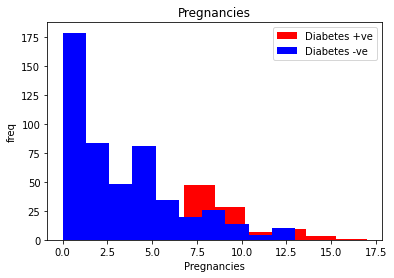

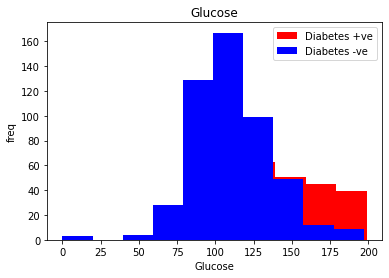

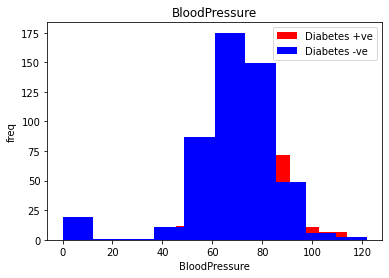

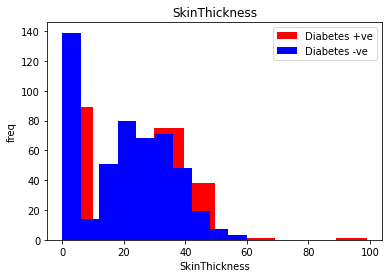

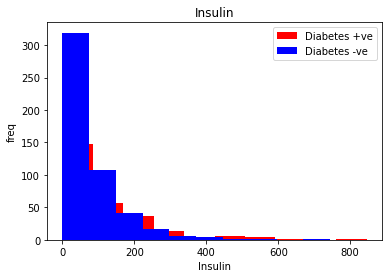

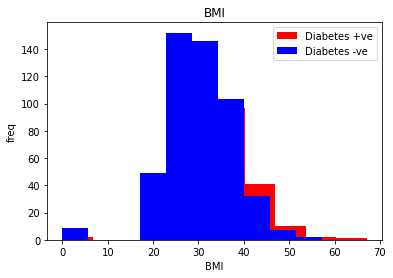

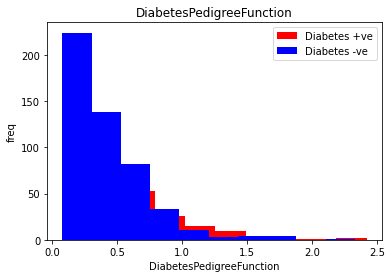

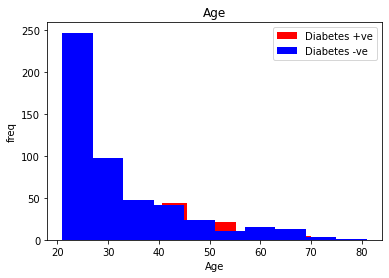

In [12]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color = 'red', label = 'Diabetes +ve')
  plt.hist(df[df['Outcome']==0][label], color = 'blue', label = 'Diabetes -ve')
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("freq")
  plt.legend()
  plt.show()

In [ ]:
type(df.columns)

pandas.core.indexes.base.Index

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
for i in range(len(df.columns[:-2])):
  print(df.columns[i])

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction


In [ ]:
df['Outcome']==1

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Outcome, Length: 768, dtype: bool

In [ ]:
len(df)

768

In [ ]:
(df['Outcome']==0).count()

768

In [ ]:
df[df['Outcome']==1].count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

In [ ]:
df[df['Outcome']==1][df.columns[5]]

0      33.6
2      23.3
4      43.1
6      31.0
8      30.5
       ... 
755    36.5
757    36.3
759    35.5
761    44.0
766    30.1
Name: BMI, Length: 268, dtype: float64

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


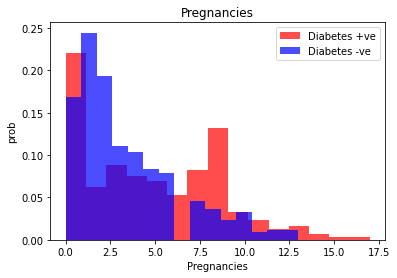

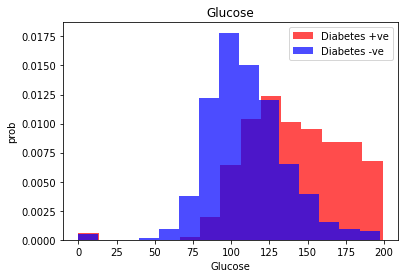

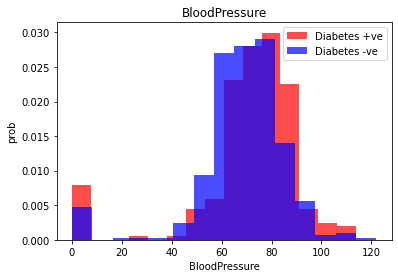

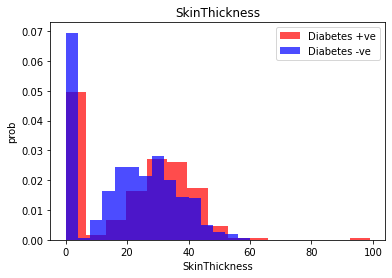

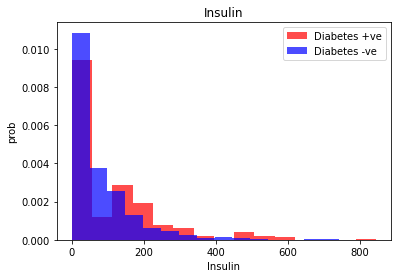

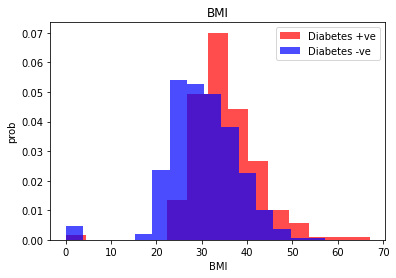

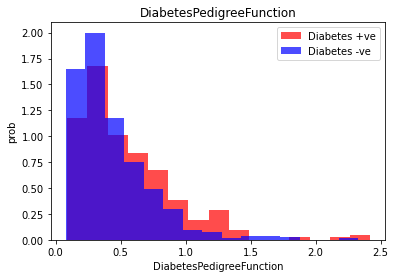

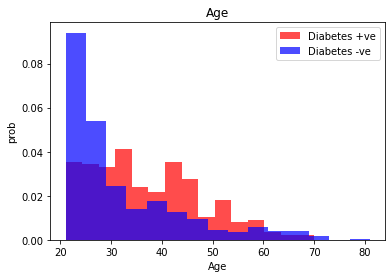

In [25]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color = 'red', label = 'Diabetes +ve', alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color = 'blue', label = 'Diabetes -ve', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("prob")
  plt.legend()
  plt.show()

In [14]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [15]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [ ]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
df[df.columns[-1]].values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [18]:
X.shape, Y.shape

((768, 8), (768,))

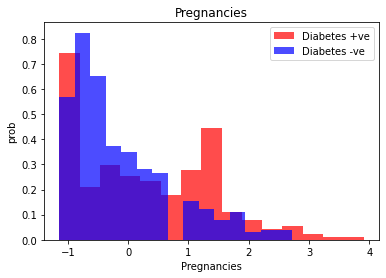

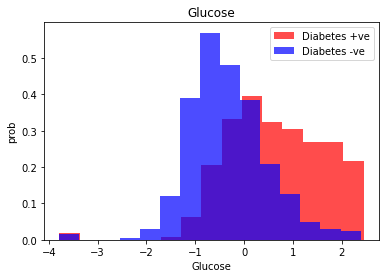

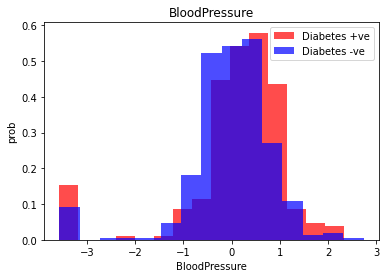

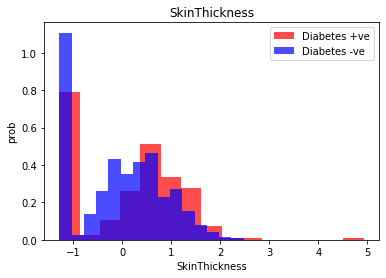

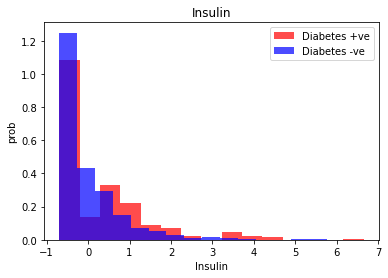

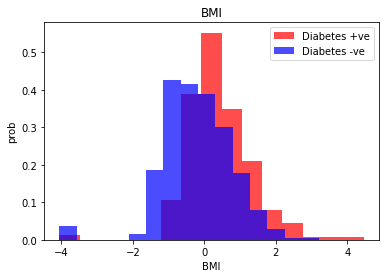

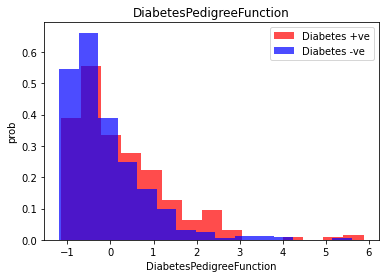

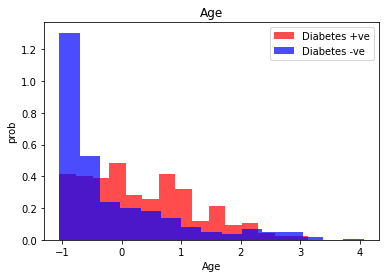

In [27]:
for i in range(len(df.columns[:-1])):
  label = transformed_df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color = 'red', label = 'Diabetes +ve', alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color = 'blue', label = 'Diabetes -ve', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("prob")
  plt.legend()
  plt.show()

In [28]:
over = RandomOverSampler()
X, Y = over.fit_resample(X, Y)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [29]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [30]:
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [33]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 1s 2ms/step - loss: 0.7755 - accuracy: 0.3850


[0.7754846811294556, 0.38499999046325684]

In [34]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.7983 - accuracy: 0.3350


[0.7982614040374756, 0.33500000834465027]

In [37]:
model.fit(x_train, y_train, batch_size=16, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
38/38 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.7900 - val_loss: 0.4077 - val_accuracy: 0.8200
Epoch 2/30
38/38 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7867 - val_loss: 0.4089 - val_accuracy: 0.8200
Epoch 3/30
38/38 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7867 - val_loss: 0.4070 - val_accuracy: 0.8150
Epoch 4/30
38/38 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.7883 - val_loss: 0.4053 - val_accuracy: 0.8150
Epoch 5/30
38/38 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7933 - val_loss: 0.4023 - val_accuracy: 0.8150
Epoch 6/30
38/38 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.7867 - val_loss: 0.4021 - val_accuracy: 0.8150
Epoch 7/30
38/38 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.7900 - val_loss: 0.4032 - val_accuracy: 0.8100
Epoch 8/30
38/38 [==

In [38]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7550


[0.4813344478607178, 0.7549999952316284]